In [37]:
import pandas as pd
import numpy as np

# === 加载 CSV 文件 ===
df = pd.read_csv('Millennium_halo.csv')
df['Mass'] = df['m_crit200'] * 1e13  # 恢复真实质量单位为 M_sun/h
volume = (62.5)**3  # milli-Millennium box

# === 定义质量 bin ===
mass_bins = np.logspace(10, 15, 50)

# === 构建 histogram 数据 ===
hist_data = {}
for snapnum in sorted(df['SnapNum'].unique()):
    m = df[df['SnapNum'] == snapnum]['Mass'].values
    hist, _ = np.histogram(m, bins=mass_bins)
    dn_dlogM = hist / volume  # 单位 h^3 Mpc^-3 dex^-1
    hist_data[f'dn_dlogM_snap{snapnum}'] = dn_dlogM

# === 保存为 .npz 文件 ===
np.savez('halo_mass_function_fixed.npz', mass_bins=mass_bins, **hist_data)
print("已成功生成 halo_mass_function_fixed.npz")

✅ 修复完成：已成功生成 halo_mass_function_fixed.npz


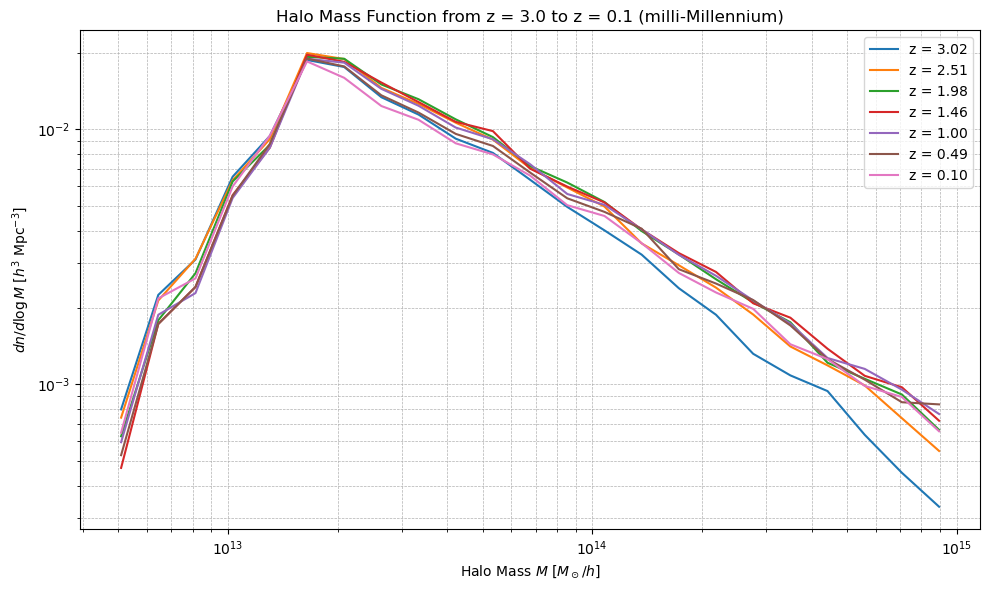

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# === 加载数据 ===
data = np.load('halo_mass_function_fixed.npz')
mass_bins = data['mass_bins']
mass_centers = (mass_bins[:-1] + mass_bins[1:]) / 2

# === SnapNum to z 对应表 ===
snap_to_z = {
    28: 3.023, 32: 2.513, 36: 1.978,
    40: 1.464, 44: 1.000, 50: 0.489, 
    58: 0.099,
}

plt.figure(figsize=(10, 6))

for snapnum, z in sorted(snap_to_z.items(), key=lambda x: x[1], reverse=True):
    key = f'dn_dlogM_snap{snapnum}'
    if key in data:
        dn_dlogM = data[key]
        # 非正常数据处理
        valid = dn_dlogM > 0
        if np.any(valid):  # 只有至少存在一个正值才画
            plt.plot(mass_centers[valid], dn_dlogM[valid], label=f'z = {z:.2f}')
        else:
            print(f"跳过 SnapNum={snapnum}（z={z}），没有正的数密度值")

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Halo Mass $M$ [$M_\odot/h$]')
plt.ylabel(r'$dn/d\log M$ [$h^3\ \mathrm{Mpc}^{-3}$]')
plt.title('Halo Mass Function from z = 3.0 to z = 0.1 (milli-Millennium)')
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.savefig('Millennium_halo distribution.png', dpi=300)
plt.show()